In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Flight Price Prediction/Clean_Dataset.csv')
df.drop(df.columns[0], axis=1, inplace = True)
print(df.shape)
df.head(3)

(300153, 11)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [3]:
df_na = df.copy()
for i in range(5000):
    df_na.iloc[random.randint(0, df_na.shape[0]-1), random.randint(0,df_na.shape[1]-1)] = np.nan
df_na.iloc[1] = np.nan
df_na.iloc[3] = np.nan
df_na.head(5)

df_na_original = df_na.copy()

# 결측치 확인하기

In [4]:
df_na_original.isnull().sum()

airline             411
flight              461
source_city         474
departure_time      451
stops               470
arrival_time        466
destination_city    477
class               426
duration            458
days_left           444
price               476
dtype: int64

In [5]:
df_na = df_na_original.copy()
df_na = df_na.dropna(how = 'any')
df_na.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df_na = df_na_original.copy()
df_na = df_na.dropna(how = 'all')
df_na.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0


# 칼럼 제거하기

In [7]:
df_na = df_na_original.copy()
df_na.drop(['flight','stops'], axis=1, inplace = True)
df_na = df_na.dropna(how = 'any')
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296109 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           296109 non-null  object 
 1   source_city       296109 non-null  object 
 2   departure_time    296109 non-null  object 
 3   arrival_time      296109 non-null  object 
 4   destination_city  296109 non-null  object 
 5   class             296109 non-null  object 
 6   duration          296109 non-null  float64
 7   days_left         296109 non-null  float64
 8   price             296109 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.6+ MB


# 결측치 대체하기

In [17]:
df_na = df_na_original.copy()
df_na = df_na.fillna(df_na.select_dtypes('number').mean())
df_na

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220185,26.007647,20889.729052
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220185,26.007647,20889.729052
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.080000,49.000000,69265.000000
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.420000,49.000000,77105.000000
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.830000,49.000000,79099.000000
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.000000,49.000000,81585.000000


In [18]:
df_na = df_na.fillna(method = 'bfill')
df_na

C:\Users\Hane\AppData\Local\Temp\ipykernel_13448\4067064476.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_na = df_na.fillna(method = 'bfill')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,12.220185,26.007647,20889.729052
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,12.220185,26.007647,20889.729052
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.080000,49.000000,69265.000000
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.420000,49.000000,77105.000000
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.830000,49.000000,79099.000000
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.000000,49.000000,81585.000000


# 이상치 파악하기

In [19]:
def findOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    IQR = q3 - q1

    y = x[(x[column] > (q3 + IQR*1.5)) | (x[column] < (q1 - IQR*1.5))]

    return len(y)

In [23]:
df_na = df_na_original.copy()
print('price Outliers : ', findOutliers(df_na, 'price'))
print('duration Outliers : ', findOutliers(df_na, 'duration'))
print('days_left Outliers : ', findOutliers(df_na, 'days_left'))

price Outliers :  123
duration Outliers :  2108
days_left Outliers :  0


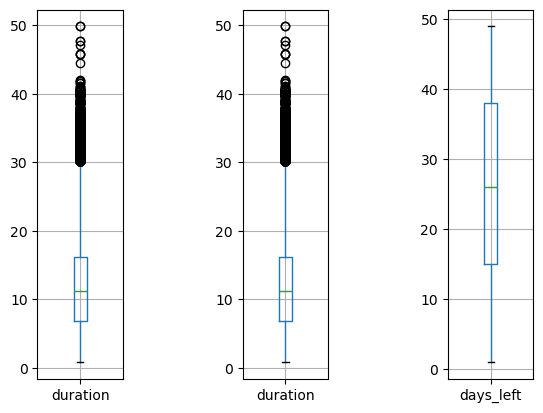

In [27]:
plt.figure()

plt.subplot(151)
df[['duration']].boxplot()

plt.subplot(153)
df[['duration']].boxplot()

plt.subplot(155)
df[['days_left']].boxplot()

plt.show()

# 이상치 처리하기

In [ ]:
#삭제하기

In [31]:
df_original = df.copy()

In [34]:
outlier_index = df[(abs(df['price']-df['price'].mean())/df['price'].std()) > 1.96].index
df.drop(outlier_index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287660 entries, 0 to 300146
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           287660 non-null  object 
 1   flight            287660 non-null  object 
 2   source_city       287660 non-null  object 
 3   departure_time    287660 non-null  object 
 4   stops             287660 non-null  object 
 5   arrival_time      287660 non-null  object 
 6   destination_city  287660 non-null  object 
 7   class             287660 non-null  object 
 8   duration          287660 non-null  float64
 9   days_left         287660 non-null  int64  
 10  price             287660 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.3+ MB


<Axes: >

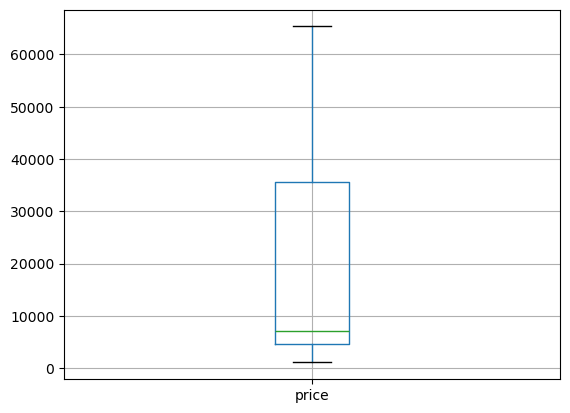

In [37]:
df[['price']].boxplot()

In [ ]:
#교체하기

In [56]:
df = df_original.copy()

In [42]:
def changeOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    IQR = q3-q1

    min, max = q1 - IQR*1.5, q3 + IQR*1.5
    
    x.loc[x[column] < min, column] = min
    x.loc[x[column] > max, column] = max

    return x    

price 이상치 대체 후 :  0


<Axes: >

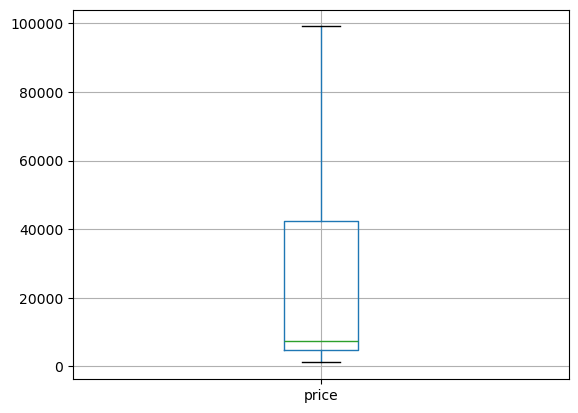

In [53]:
df = changeOutliers(df, 'price')

print("price 이상치 대체 후 : ", findOutliers(df, 'price'))
df[['price']].boxplot()

<Axes: >

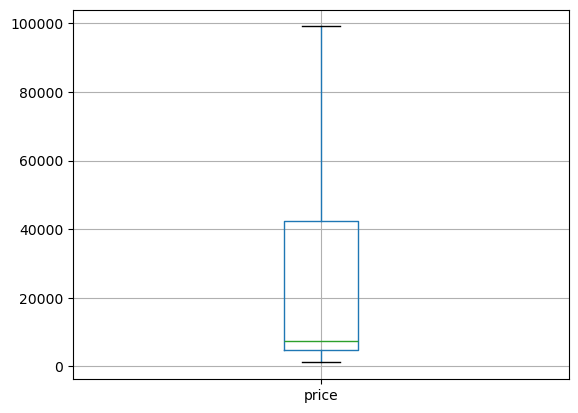

# 구간화하기

In [59]:
df['distance'] = pd.cut(df['duration'], bins=[0, 5, 10, max(df['duration'])], labels = ['short','medium','long'])
df['distance'].value_counts()

distance
long      169879
medium     84761
short      45513
Name: count, dtype: int64

In [61]:
df['price_rate'] = pd.qcut(df['price'], q = 4, labels = ['cheap','normal','expensive','too expensive'])
df['price_rate'].value_counts()

price_rate
expensive        75584
normal           75117
cheap            75073
too expensive    74379
Name: count, dtype: int64